
# Simple mole balances




## Review of the mole balance



-   **Mole** balances are performed for a *species* in a control volume

![img](./images/mole-balance.png)

\begin{align}
Accumulation &=& In - Out + Generation \\
\frac{dN_J}{dt} &=& F_{J0} - F_J + V r_J
\end{align}

-   Here we use the convention that $N_j$ refers to the total number of moles of species $J$ in the volume, $F_J$ is a molar flow of $J$, and $r_J$ is the intensive rate of production of $J$, and it has a negative magnitude if species $J$ is in fact being consumed.

Now, we consider specific examples. We will go in order of mathematical difficulty:

-   steady state, (non)linear algebraic
-   ordinary differential equations




## A continuously stirred tank reactor



Here is the typical schematic diagram of a continuously stirred tank reactor (CSTR).

![img](./images/constant-volume-cstr.png)

-   We assume the tank is well-mixed because it is well-stirred
-   The concentration at the exit is the same as everywhere in the tank
-   The mole balance at steady state ($\frac {dN_A}{dt} = 0) $ is:

$0 = F_{A0} - F_A + V r_A $




## A continuously stirred tank reactor problem



-   We have a 10L stirred tank reactor
-   $A$ flows in at a molar flow rate of 1 mol/hr and volumetric flowrate of 2.5 L/hr
-   $-r_A = k C_A$, $k = 0.23$ 1/hr
-   What is the steady-state exit concentration of $A$?

-   The equations

\begin{align}
\frac{dN_A}{dt} = 0 &=& F_{A0} - F_A + V r_A \\
                  0 &=& F_{A0} - F_A  - V k C_{A, exit} \\
                  0 &=& F_{A0} - v_0 C_{A, exit} - V  k C_{A, exit}
\end{align}

\begin{align}
C_{A, exit} = \frac{F_{A0}}{v_0 + V k}
\end{align}

-   Only for constant volume
-   Assumes well-mixed, i.e. uniform concentration




## Solving the problem with algebra (CSTR)



-   Simple algebra



In [8]:
k = 0.23  # 1/hr
Fa0 = 1.0 # mol /hr
v0 = 2.5  # L /hr
V = 10.0    # L

Ca_exit = Fa0 / (v0 + V * k)
print('Ca_exit = {0:1.3f} mol / L'.format(Ca_exit))

Ca_exit = 0.208 mol / L


-   This was an easy problem, but the algebraic manipulations are all possible places where errors can be made.
-   Let us consider a numerical approach




## Solving the problem numerically using a solver (CSTR)



-   We have to create a function that is equal to zero at the solution.
    -   We have that directly from the mole balance:
        
        $0 = F_{A0} - F_A + V r_A$
    
    -   We just have to make sure to use the correct variables, with correct units.

-   We use a nonlinear solver, so we also have to provide an initial guess. You may want to review [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)



In [9]:
from scipy.optimize import fsolve

k = 0.23   # 1/hr
Fa0 = 1.0  # mol /hr
v0 = 2.5   # L /hr
V = 10     # L

def func(Ca):
    ra = -k * Ca
    Fa = v0 * Ca
    return Fa0 - Fa + V * ra

guess = 1.0  # mol / L
ans, = fsolve(func, guess)  # note the comma after ans. That "unpacks" the array

print('Ca_exit = {0} mol/L'.format(ans))

Ca_exit = 0.20833333333333334 mol/L


-   This had less manipulation, and fewer opportunities for mistakes
-   On the other hand, we ended up using a solver that required an initial guess to solve a linear problem.
-   This was a simple problem, but other problems will not be linear, and will be much more difficult.
-   Remember what the units are? Were they consistent?




## Solving the problem with uncertainty (CSTR)



[uncertainty](uncertainty)

-   Uncertainty analysis is not built in to python
-   We have to install the `uncertainties` package and import it

Let us assume there is some uncertainty in the rate constant, say it is $k = 0.23 \pm 0.1$ 1/hr.

-   Is that a lot of uncertainty?

We can use the `uncertainties` package to propagate that error automatically.

[uncertainties.ufloat](https://www.google.com/#safe=off&q=uncertainties.ufloat)



In [10]:
import uncertainties as u

k = u.ufloat(0.23, 0.1)   # rate constant 1/hr
Fa0 = 1.0                 # inlet molar flow mol/hr
v0 = u.ufloat(2.5,1)                  # volumetric flow L/hr
V = 10                    # reactor volume L
Cae = Fa0 / (v0 + V * k)
print('Ca,exit = {0}'.format(Cae))

Ca,exit = 0.21+/-0.06


-   `uncertainties` is also great for simple problems
-   We have to do some work to make it work in other situations




# Mole balance on a batch reactor



The next more complex (mathematically) mole balance is the batch reactor. The batch reactor does not operate at steady state, and therefore we have an ordinary differential equation that describes the number of moles in the reactor as a function of time.

![img](./images/constant-volume-batch.png)

-   Constant volume
-   No flow in or out

$ \frac{dN_A}{dt} = V r_A $




## Simple application of a mole balance to a constant volume batch reactor



-   At $t=0$ we have an initial concentration of 2 mol/L
-   $-r_A = k C_A$ with $k = 0.23$ 1/hr
-   How much A is left after 1 hour?

-   Equations

\begin{align}
N_A &=& C_A V \\
\frac{dN_A}{dt} &=& V \frac{dC_A}{dt} \\
\frac{dC_A}{dt} &=& r_A = -k C_A \\
C_A(t=0) &=& C_{A0}
\end{align}

-   Only for constant volume
-   Assumes well-mixed, i.e. uniform concentration
-   Initial condition, ordinary differential equation




## Solving the problem (constant volume batch reactor)



We have an ordinary differential equation with an initial condition. We need to integrate it from t=0 to t=1 hour, and then get the solution at t=1 hour.

[scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)



In [12]:
import numpy as np
from scipy.integrate import odeint

k = 0.23   # 1/hr
Ca0 = 2.0  # mol / L

def ode(Ca, t):
    dCadt = -k * Ca
    return dCadt

tspan = np.linspace(0, 1)  # hours
sol = odeint(ode, Ca0,  tspan)

# sol is a 2d array. It has as many rows as tspan, and as many columns as Ca0
print(type(sol), sol.shape)

# We want the last value of sol, which is in the last row, column 0
print('C_A at t = 1 hour = {0:1.2f} mol/L'.format(sol[-1, 0]))

<class 'numpy.ndarray'> (50, 1)
C_A at t = 1 hour = 1.59 mol/L


-   Remember what the units are?




## Plotting $C_A$ vs. time in a batch reactor



-   Now let us solve the ODE and plot the solution.



shapes:  (100,) (100, 1)


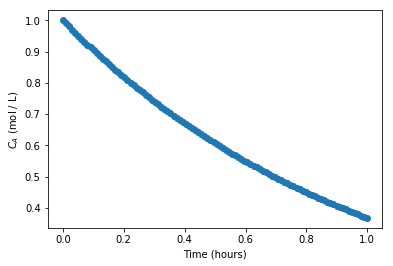

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k = 1   # 1 / hr
Ca0 = 1.0  # mol / L

def ode(Ca, t):
    dCadt = -k * Ca
    return dCadt

tspan = np.linspace(0, 1,100)
sol = odeint(ode, Ca0,  tspan)

# Note: tspan is a 1d array, and sol is a 2d array. numpy understands these
# arrays are compatible based on their sizes and shapes.
print('shapes: ',tspan.shape, sol.shape)

plt.plot(tspan, sol,'o-')
plt.xlabel('Time (hours)')
plt.ylabel('$C_A$ (mol / L)')
plt.show()

In [20]:
sol[-1]

array([0.63327356])

In [17]:
tspan

array([0. , 2.5, 5. ])

-   $C_A$ decreases with time (it is consumed)
-   It is not apparent from this graph because of the short time, but the concentration decreases exponentially with time (plot for longer time to see it).

